In [1]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Amazon reviews.csv to Amazon reviews.csv


In [5]:
data=pd.read_csv('Amazon reviews.csv', encoding='latin', error_bad_lines=False)
data

id       profileName  \
0    R3FYB6F4TODK9A       Jnan Shetty   
1    R35BGB3PKZS1Z4    Akshay Mokashi   
2    R2ZKCREO7UCSVY      Areeba Owais   
3    R24WOSD1X14AHT            Faiyaz   
4    R2425P41SEXTW4        Madhupriya   
..              ...               ...   
577  R16U8Y6ACQD6MQ    lalit kaindal    
578   RCWDNNOD40M4X     Shubham singh   
579  R2Q1X0264V6WBC  Pratyusha Mahata   
580  R29OUW5L3QS3CA  Moorthy kamarasu   
581  R1DYT9EP86C5L9              Indu   

                                                  text  \
0    This is my first iPhone and it always feels go...   
1    â â â â â â â â â â â â...   
2    My husband gifted this to me and I am very hap...   
3    Design:The iPhone 13 retains the iconic design...   
4    Reviewing after 4 months of usage. Like everyo...   
..                                                 ...   
577                                          Beautiful   
578                           Mind blowing performance   
579                        Love this ð·â¤ï¸âð¥   
580                                               Good   
581  Phone arrived in good condition and delivered ...   

                                      date  \
0    Reviewed in India on 30 December 2023   
1      Reviewed in India on 8 October 2023   
2     Reviewed in India on 1 February 2024   
3      Reviewed in India on 5 January 2024   
4     Reviewed in India on 25 January 2024   
..                                     ...   
577  Reviewed in India on 29 December 2023   
578  Reviewed in India on 27 December 2023   
579  Reviewed in India on 30 December 2023   
580  Reviewed in India on 27 December 2023   
581  Reviewed in India on 21 December 2023   

                                  title              rating  \
0    Using after 3 months honest review  5.0 out of 5 stars   
1                               Awesome  5.0 out of 5 stars   
2            It's amazing I love iphone  5.0 out of 5 stars   
3                    Amazing Phone ð¤  4.0 out of 5 stars   
4       Always wanted to buy an Iphone!  4.0 out of 5 stars   
..                                  ...                 ...   
577                               Fresh  5.0 out of 5 stars   
578                        I phone user  5.0 out of 5 stars   
579                        Best product  5.0 out of 5 stars   
580                                Good  5.0 out of 5 stars   
581                              Beauty  5.0 out of 5 stars   

                                                images  helpful  \
0                                                  NaN       18   
1    https://m.media-amazon.com/images/I/61UwOO5e7Q...      146   
2    https://m.media-amazon.com/images/I/61TUeAMaIA...        0   
3    https://m.media-amazon.com/images/I/61QIxk0QMV...       13   
4    https://m.media-amazon.com/images/I/61Er-tU-Qo...        0   
..                                                 ...      ...   
577                                                NaN        0   
578  https://m.media-amazon.com/images/I/81djBW-9At...        0   
579  https://m.media-amazon.com/images/I/61Q9rP3JbU...        2   
580                                                NaN        0   
581  https://m.media-amazon.com/images/I/71HJWzIBoj...        0   

    variant:colour variant:size  variant:  
0             Blue       128 GB       NaN  
1        Starlight       128 GB       NaN  
2         Midnight       128 GB       NaN  
3        Starlight       128 GB       NaN  
4            Green       128 GB       NaN  
..             ...          ...       ...  
577           Blue       128 GB       NaN  
578       Midnight       128 GB       NaN  
579           Pink       128 GB       NaN  
580       Midnight       128 GB       NaN  
581           Pink       128 GB       NaN  

[582 rows x 11 columns]

In [6]:
data=data['text']
data

0      This is my first iPhone and it always feels go...
1      â â â â â â â â â â â â...
2      My husband gifted this to me and I am very hap...
3      Design:The iPhone 13 retains the iconic design...
4      Reviewing after 4 months of usage. Like everyo...
                             ...                        
577                                            Beautiful
578                             Mind blowing performance
579                          Love this ð·â¤ï¸âð¥
580                                                 Good
581    Phone arrived in good condition and delivered ...
Name: text, Length: 582, dtype: object

In [7]:
data=[y.strip() for y in data]
data

['This is my first iPhone and it always feels good to hold this masterpiece. This looks premium not just because of its branding, it has everything which makes it feel premium. However, despite all the looks and finish, the transition from Android to Apple is not very smooth and you may constantly lack certain features that can make life easy. I was using vivo y19 Lite before this and still have that phone with me. Putting out the feature that is being missed by me-1. Forwarding Anything in Whatsapp: Forwarding anything in Whatsapp from IPhone takes bit more step as compared to what is being offered in Android. This makes the entire process slow for an Android User2. App Switcher: Apple could have easily made App Switcher easy with just light Swipe up, instead they made it with long pressed Swipe up. Why man, why.. You don\'t have any features for Swipe up, just make it easy to launch.3. Andorid Dialer is Always Missed: Every android has a basic feature, where you can search the contac

In [8]:
data=[x for x in data if x]
data

['This is my first iPhone and it always feels good to hold this masterpiece. This looks premium not just because of its branding, it has everything which makes it feel premium. However, despite all the looks and finish, the transition from Android to Apple is not very smooth and you may constantly lack certain features that can make life easy. I was using vivo y19 Lite before this and still have that phone with me. Putting out the feature that is being missed by me-1. Forwarding Anything in Whatsapp: Forwarding anything in Whatsapp from IPhone takes bit more step as compared to what is being offered in Android. This makes the entire process slow for an Android User2. App Switcher: Apple could have easily made App Switcher easy with just light Swipe up, instead they made it with long pressed Swipe up. Why man, why.. You don\'t have any features for Swipe up, just make it easy to launch.3. Andorid Dialer is Always Missed: Every android has a basic feature, where you can search the contac

In [9]:
text=''.join(data)
text

'This is my first iPhone and it always feels good to hold this masterpiece. This looks premium not just because of its branding, it has everything which makes it feel premium. However, despite all the looks and finish, the transition from Android to Apple is not very smooth and you may constantly lack certain features that can make life easy. I was using vivo y19 Lite before this and still have that phone with me. Putting out the feature that is being missed by me-1. Forwarding Anything in Whatsapp: Forwarding anything in Whatsapp from IPhone takes bit more step as compared to what is being offered in Android. This makes the entire process slow for an Android User2. App Switcher: Apple could have easily made App Switcher easy with just light Swipe up, instead they made it with long pressed Swipe up. Why man, why.. You don\'t have any features for Swipe up, just make it easy to launch.3. Andorid Dialer is Always Missed: Every android has a basic feature, where you can search the contact

In [10]:
no_punc_text=text.translate(str.maketrans("","", string.punctuation))
no_punc_text

'This is my first iPhone and it always feels good to hold this masterpiece This looks premium not just because of its branding it has everything which makes it feel premium However despite all the looks and finish the transition from Android to Apple is not very smooth and you may constantly lack certain features that can make life easy I was using vivo y19 Lite before this and still have that phone with me Putting out the feature that is being missed by me1 Forwarding Anything in Whatsapp Forwarding anything in Whatsapp from IPhone takes bit more step as compared to what is being offered in Android This makes the entire process slow for an Android User2 App Switcher Apple could have easily made App Switcher easy with just light Swipe up instead they made it with long pressed Swipe up Why man why You dont have any features for Swipe up just make it easy to launch3 Andorid Dialer is Always Missed Every android has a basic feature where you can search the contact directly from Phone Dial

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
text_tokens

['This',
 'is',
 'my',
 'first',
 'iPhone',
 'and',
 'it',
 'always',
 'feels',
 'good',
 'to',
 'hold',
 'this',
 'masterpiece',
 'This',
 'looks',
 'premium',
 'not',
 'just',
 'because',
 'of',
 'its',
 'branding',
 'it',
 'has',
 'everything',
 'which',
 'makes',
 'it',
 'feel',
 'premium',
 'However',
 'despite',
 'all',
 'the',
 'looks',
 'and',
 'finish',
 'the',
 'transition',
 'from',
 'Android',
 'to',
 'Apple',
 'is',
 'not',
 'very',
 'smooth',
 'and',
 'you',
 'may',
 'constantly',
 'lack',
 'certain',
 'features',
 'that',
 'can',
 'make',
 'life',
 'easy',
 'I',
 'was',
 'using',
 'vivo',
 'y19',
 'Lite',
 'before',
 'this',
 'and',
 'still',
 'have',
 'that',
 'phone',
 'with',
 'me',
 'Putting',
 'out',
 'the',
 'feature',
 'that',
 'is',
 'being',
 'missed',
 'by',
 'me1',
 'Forwarding',
 'Anything',
 'in',
 'Whatsapp',
 'Forwarding',
 'anything',
 'in',
 'Whatsapp',
 'from',
 'IPhone',
 'takes',
 'bit',
 'more',
 'step',
 'as',
 'compared',
 'to',
 'what',
 'is',
 'b

In [13]:
text_tokens[0:72]

['This',
 'is',
 'my',
 'first',
 'iPhone',
 'and',
 'it',
 'always',
 'feels',
 'good',
 'to',
 'hold',
 'this',
 'masterpiece',
 'This',
 'looks',
 'premium',
 'not',
 'just',
 'because',
 'of',
 'its',
 'branding',
 'it',
 'has',
 'everything',
 'which',
 'makes',
 'it',
 'feel',
 'premium',
 'However',
 'despite',
 'all',
 'the',
 'looks',
 'and',
 'finish',
 'the',
 'transition',
 'from',
 'Android',
 'to',
 'Apple',
 'is',
 'not',
 'very',
 'smooth',
 'and',
 'you',
 'may',
 'constantly',
 'lack',
 'certain',
 'features',
 'that',
 'can',
 'make',
 'life',
 'easy',
 'I',
 'was',
 'using',
 'vivo',
 'y19',
 'Lite',
 'before',
 'this',
 'and',
 'still',
 'have',
 'that']

In [14]:
len(text_tokens)

21681

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords

In [17]:
my_stop_words=stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['This', 'first', 'iPhone', 'always', 'feels', 'good', 'hold', 'masterpiece', 'This', 'looks', 'premium', 'branding', 'everything', 'makes', 'feel', 'premium', 'However', 'despite', 'looks', 'finish', 'transition', 'Android', 'Apple', 'smooth', 'may', 'constantly', 'lack', 'certain', 'features', 'make', 'life', 'easy', 'I', 'using', 'vivo', 'y19', 'Lite', 'still', 'phone', 'Putting', 'feature', 'missed', 'me1', 'Forwarding', 'Anything', 'Whatsapp', 'Forwarding', 'anything', 'Whatsapp', 'IPhone', 'takes', 'bit', 'step', 'compared', 'offered', 'Android', 'This', 'makes', 'entire', 'process', 'slow', 'Android', 'User2', 'App', 'Switcher', 'Apple', 'could', 'easily', 'made', 'App', 'Switcher', 'easy', 'light', 'Swipe', 'instead', 'made', 'long', 'pressed', 'Swipe', 'Why', 'man', 'You', 'dont', 'features', 'Swipe', 'make', 'easy', 'launch3', 'Andorid', 'Dialer', 'Always', 'Missed', 'Every', 'android', 'basic', 'feature', 'search', 'contact', 'directly', 'Phone', 'Dialer', 'Dialer', 'used', 

In [19]:
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['this', 'first', 'iphone', 'always', 'feels', 'good', 'hold', 'masterpiece', 'this', 'looks', 'premium', 'branding', 'everything', 'makes', 'feel', 'premium', 'however', 'despite', 'looks', 'finish', 'transition', 'android', 'apple', 'smooth', 'may', 'constantly', 'lack', 'certain', 'features', 'make', 'life', 'easy', 'i', 'using', 'vivo', 'y19', 'lite', 'still', 'phone', 'putting', 'feature', 'missed', 'me1', 'forwarding', 'anything']


In [20]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['thi', 'first', 'iphon', 'alway', 'feel', 'good', 'hold', 'masterpiec', 'thi', 'look', 'premium', 'brand', 'everyth', 'make', 'feel', 'premium', 'howev', 'despit', 'look', 'finish', 'transit', 'android', 'appl', 'smooth', 'may', 'constantli', 'lack', 'certain', 'featur', 'make', 'life', 'easi', 'i', 'use', 'vivo', 'y19', 'lite', 'still', 'phone', 'put']


In [21]:
nlp=spacy.load('en_core_web_sm')

In [22]:
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

This first iPhone always feels good hold masterpiece This looks premium branding everything makes feel premium However despite looks finish transition Android Apple smooth may constantly lack certain features make life easy I using vivo y19 Lite still phone Putting


In [23]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:20])

['this', 'first', 'iPhone', 'always', 'feel', 'good', 'hold', 'masterpiece', 'this', 'look', 'premium', 'brand', 'everything', 'make', 'feel', 'premium', 'however', 'despite', 'look', 'finish']


**Feature Extraction**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [25]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

this  first  iphone  always  feel  good  hold  masterpiece  look  premium  \
0  2869   1162    1483     260  1136  1259  1370         1752  1699     2205   

   ...  recommendbhot  acha  magar  bina  aayaawesome  phonegoodbeautifulmind  \
0  ...           2376   191   1720   474          178                    2117   

   blowing  performancelove  goodphone  beautiful  
0      488             2089       1277        436  

[1 rows x 3198 columns]

In [26]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
this                    2869
first                   1162
iphone                  1483
always                   260
feel                    1136
...                      ...
phonegoodbeautifulmind  2117
blowing                  488
performancelove         2089
goodphone               1277
beautiful                436

[3198 rows x 1 columns]

In [27]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0, ascending=False).head(30)

0
àª¾àª         3197
àªµàª¾àªªàª   3196
àªµàª¾        3195
àª            3194
¾à            3193
¾it           3192
¹ï            3191
¹à            3190
µà            3189
²à            3188
²i            3187
ªà            3186
zooming       3185
zoom          3184
zero          3183
youâ          3182
youwhatsapp   3181
youtube       3180
youthe        3179
yoursâ        3178
yourequire    3177
your          3176
youduplicate  3175
youbestgood   3174
you           3173
yet           3172
yes           3171
yellowess     3170
yeh           3169
yearsi        3168

In [28]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0, ascending=True).head(30)

0
0100            0
05x             1
10              2
100             3
100percent      4
100pros1        5
1010after       6
10k             7
11              8
11k             9
11x            10
12             11
120            12
12000          13
12000rs        14
120hz          15
1212           16
128            17
128gbpros1     18
12apple        19
12hrsâ         20
13             21
13after        22
13falsethe     23
13having       24
13iâ           25
13performance  26
13s            27
13slowlythe    28
13so           29

In [29]:
print(vectorizer.vocabulary_)

{'this': 2869, 'first': 1162, 'iphone': 1483, 'always': 260, 'feel': 1136, 'good': 1259, 'hold': 1370, 'masterpiece': 1752, 'look': 1699, 'premium': 2205, 'brand': 520, 'everything': 1027, 'make': 1730, 'however': 1384, 'despite': 849, 'finish': 1158, 'transition': 2932, 'android': 288, 'apple': 310, 'smooth': 2656, 'may': 1760, 'constantly': 732, 'lack': 1612, 'certain': 617, 'feature': 1126, 'life': 1650, 'easy': 954, 'use': 3003, 'vivo': 3056, 'y19': 3161, 'lite': 1677, 'still': 2734, 'phone': 2106, 'putting': 2316, 'miss': 1809, 'me1': 1763, 'forward': 1197, 'anything': 303, 'whatsapp': 3099, 'take': 2809, 'bit': 476, 'step': 2730, 'compare': 688, 'offer': 1937, 'entire': 1002, 'process': 2239, 'slow': 2645, 'user2': 3013, 'app': 307, 'switcher': 2800, 'could': 757, 'easily': 951, 'light': 1660, 'swipe': 2797, 'instead': 1458, 'long': 1696, 'press': 2211, 'why': 3110, 'man': 1734, 'you': 3173, 'do': 910, 'not': 1905, 'launch3': 1627, 'andorid': 287, 'dialer': 866, 'every': 1023, 'b

In [30]:
print(vectorizer.get_feature_names_out()[50:100])

['1703' '1703i' '1711' '1712' '19' '1900rs' '1hour' '1k' '1st' '1star'
 '1x' '20' '2000' '2021' '2023' '2023i' '2024' '2027' '20k' '20w'
 '2160p60' '21st' '22' '2250' '23' '24' '25' '250' '25500' '255phone'
 '256' '25k' '27k' '28112023technician' '2hrsâ' '2k' '2nd' '30' '300'
 '3000hm' '3040' '32â' '34' '34000' '3540' '3k' '3month' '3rd' '400'
 '40000otherwise']


**bigrams and trigrams**

In [31]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',
                                       ngram_range=(1,4),
                                       max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(data)
bow_matrix_ngram

<582x100 sparse matrix of type '<class 'numpy.int64'>'
	with 6765 stored elements in Compressed Sparse Row format>

In [32]:
print(vectorizer_ngram_range.get_feature_names_out())

['13' 'about' 'after' 'all' 'also' 'am' 'amazon' 'an' 'and' 'and the'
 'android' 'any' 'apple' 'are' 'as' 'at' 'battery' 'battery life' 'be'
 'best' 'better' 'bought' 'but' 'buy' 'camera' 'can' 'day' 'delivery'
 'don' 'even' 'experience' 'for' 'from' 'get' 'go' 'good' 'got' 'great'
 'has' 'have' 'if' 'if you' 'in' 'ios' 'iphone' 'iphone 13' 'is' 'is good'
 'is not' 'issue' 'it' 'it is' 'its' 'just' 'life' 'like' 'me' 'mobile'
 'money' 'more' 'my' 'new' 'no' 'not' 'now' 'of' 'of the' 'on' 'one'
 'only' 'or' 'performance' 'phone' 'phone is' 'price' 'product' 'quality'
 'screen' 'service' 'so' 'than' 'that' 'the' 'the iphone' 'the phone'
 'there' 'they' 'this' 'time' 'to' 'use' 'using' 'very' 'was' 'when'
 'which' 'will' 'with' 'you' 'your']


In [33]:
print(bow_matrix_ngram.toarray())

[[ 0  0  0 ...  4 14  1]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  1  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]]


**TFidf Vectorizer**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features=TfidfVectorizer(norm="l2",
                                               analyzer='word',
                                               ngram_range=(1,4),
                                               max_features=100)
tf_idf_matrix_n_gram_max_features=vectorizer_n_gram_max_features.fit_transform(data)

In [35]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

['13' 'about' 'after' 'all' 'also' 'am' 'amazon' 'an' 'and' 'and the'
 'android' 'any' 'apple' 'are' 'as' 'at' 'battery' 'battery life' 'be'
 'best' 'better' 'bought' 'but' 'buy' 'camera' 'can' 'day' 'delivery'
 'don' 'even' 'experience' 'for' 'from' 'get' 'go' 'good' 'got' 'great'
 'has' 'have' 'if' 'if you' 'in' 'ios' 'iphone' 'iphone 13' 'is' 'is good'
 'is not' 'issue' 'it' 'it is' 'its' 'just' 'life' 'like' 'me' 'mobile'
 'money' 'more' 'my' 'new' 'no' 'not' 'now' 'of' 'of the' 'on' 'one'
 'only' 'or' 'performance' 'phone' 'phone is' 'price' 'product' 'quality'
 'screen' 'service' 'so' 'than' 'that' 'the' 'the iphone' 'the phone'
 'there' 'they' 'this' 'time' 'to' 'use' 'using' 'very' 'was' 'when'
 'which' 'will' 'with' 'you' 'your']


In [36]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.0864618  0.32552371 0.03016375]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.18180347 0.19556561 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.41113378 0.         0.        ]]


**WordCloud**

In [37]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(60,40))
  plt.imshow(wordcloud)
  plt.axis("off")

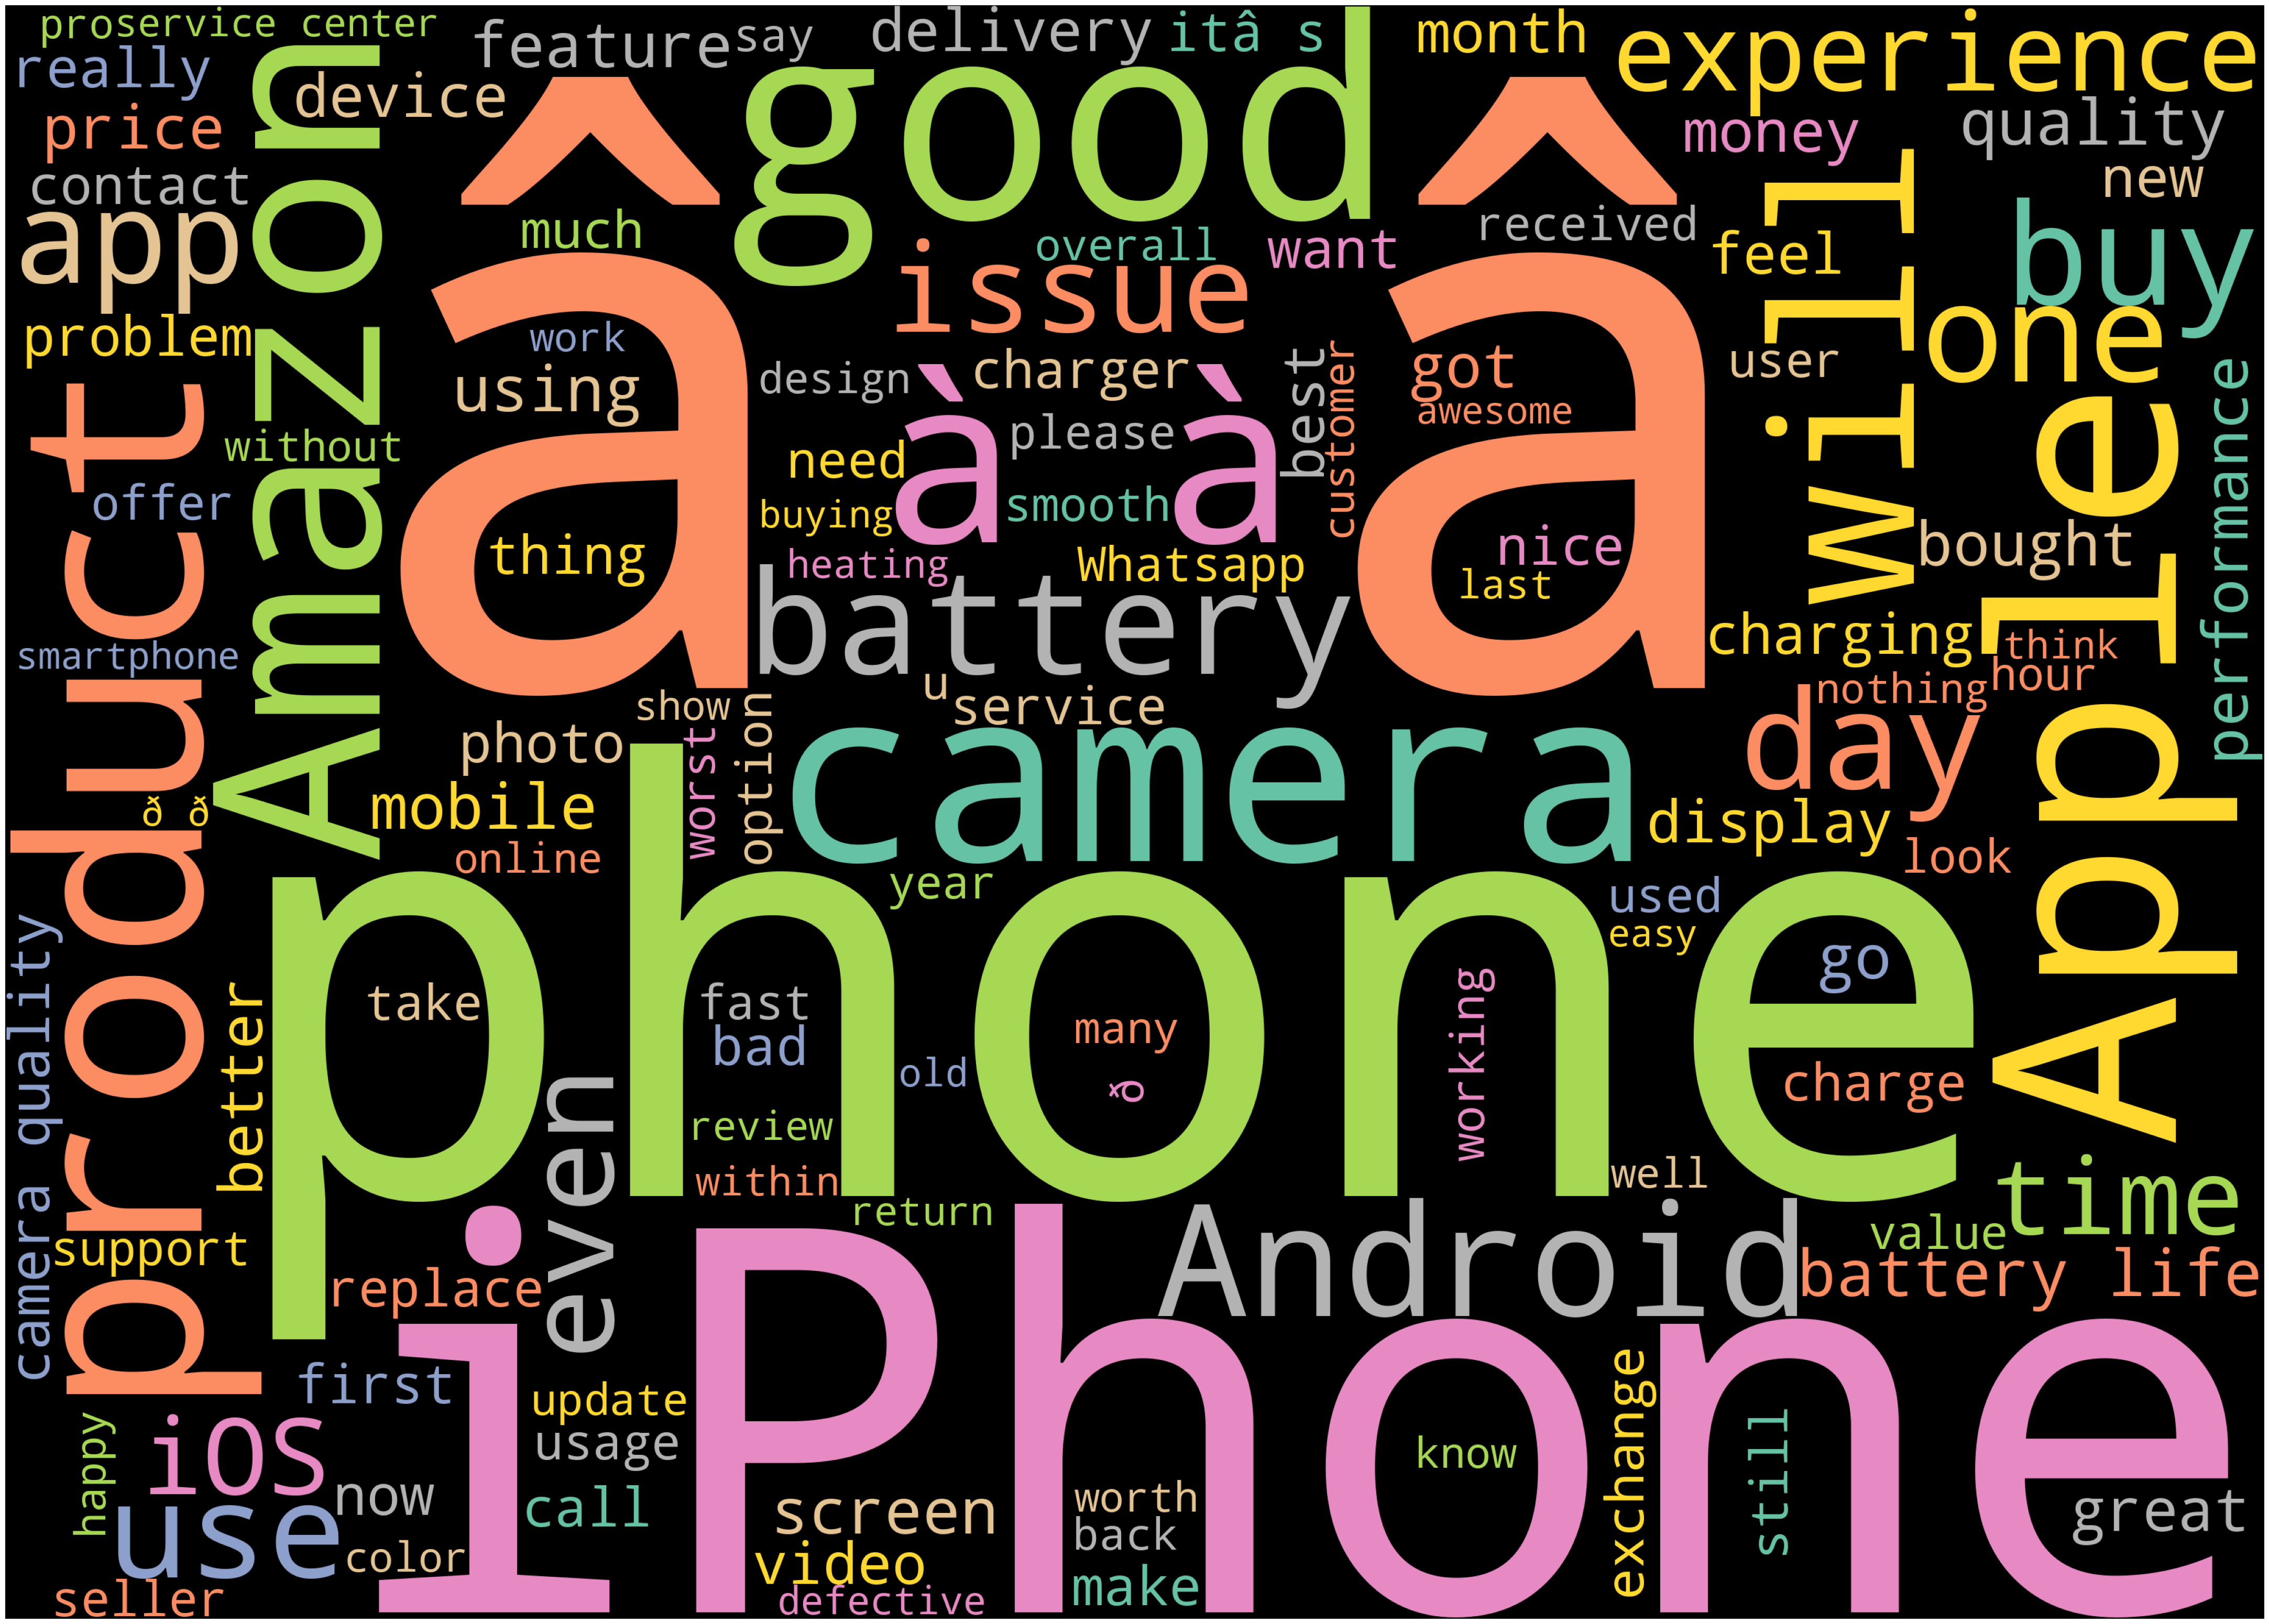

In [38]:
wordcloud=WordCloud(width=3500,
                    height=2500,
                    background_color='black',
                    max_words=120,
                    colormap='Set2').generate(text)
plot_cloud(wordcloud)

In [39]:
data2=pd.read_csv('Amazon reviews.csv', encoding='latin', error_bad_lines=False)
data2

id       profileName  \
0    R3FYB6F4TODK9A       Jnan Shetty   
1    R35BGB3PKZS1Z4    Akshay Mokashi   
2    R2ZKCREO7UCSVY      Areeba Owais   
3    R24WOSD1X14AHT            Faiyaz   
4    R2425P41SEXTW4        Madhupriya   
..              ...               ...   
577  R16U8Y6ACQD6MQ    lalit kaindal    
578   RCWDNNOD40M4X     Shubham singh   
579  R2Q1X0264V6WBC  Pratyusha Mahata   
580  R29OUW5L3QS3CA  Moorthy kamarasu   
581  R1DYT9EP86C5L9              Indu   

                                                  text  \
0    This is my first iPhone and it always feels go...   
1    â â â â â â â â â â â â...   
2    My husband gifted this to me and I am very hap...   
3    Design:The iPhone 13 retains the iconic design...   
4    Reviewing after 4 months of usage. Like everyo...   
..                                                 ...   
577                                          Beautiful   
578                           Mind blowing performance   
579                        Love this ð·â¤ï¸âð¥   
580                                               Good   
581  Phone arrived in good condition and delivered ...   

                                      date  \
0    Reviewed in India on 30 December 2023   
1      Reviewed in India on 8 October 2023   
2     Reviewed in India on 1 February 2024   
3      Reviewed in India on 5 January 2024   
4     Reviewed in India on 25 January 2024   
..                                     ...   
577  Reviewed in India on 29 December 2023   
578  Reviewed in India on 27 December 2023   
579  Reviewed in India on 30 December 2023   
580  Reviewed in India on 27 December 2023   
581  Reviewed in India on 21 December 2023   

                                  title              rating  \
0    Using after 3 months honest review  5.0 out of 5 stars   
1                               Awesome  5.0 out of 5 stars   
2            It's amazing I love iphone  5.0 out of 5 stars   
3                    Amazing Phone ð¤  4.0 out of 5 stars   
4       Always wanted to buy an Iphone!  4.0 out of 5 stars   
..                                  ...                 ...   
577                               Fresh  5.0 out of 5 stars   
578                        I phone user  5.0 out of 5 stars   
579                        Best product  5.0 out of 5 stars   
580                                Good  5.0 out of 5 stars   
581                              Beauty  5.0 out of 5 stars   

                                                images  helpful  \
0                                                  NaN       18   
1    https://m.media-amazon.com/images/I/61UwOO5e7Q...      146   
2    https://m.media-amazon.com/images/I/61TUeAMaIA...        0   
3    https://m.media-amazon.com/images/I/61QIxk0QMV...       13   
4    https://m.media-amazon.com/images/I/61Er-tU-Qo...        0   
..                                                 ...      ...   
577                                                NaN        0   
578  https://m.media-amazon.com/images/I/81djBW-9At...        0   
579  https://m.media-amazon.com/images/I/61Q9rP3JbU...        2   
580                                                NaN        0   
581  https://m.media-amazon.com/images/I/71HJWzIBoj...        0   

    variant:colour variant:size  variant:  
0             Blue       128 GB       NaN  
1        Starlight       128 GB       NaN  
2         Midnight       128 GB       NaN  
3        Starlight       128 GB       NaN  
4            Green       128 GB       NaN  
..             ...          ...       ...  
577           Blue       128 GB       NaN  
578       Midnight       128 GB       NaN  
579           Pink       128 GB       NaN  
580       Midnight       128 GB       NaN  
581           Pink       128 GB       NaN  

[582 rows x 11 columns]

In [40]:
data2=data2['text']
data2

0      This is my first iPhone and it always feels go...
1      â â â â â â â â â â â â...
2      My husband gifted this to me and I am very hap...
3      Design:The iPhone 13 retains the iconic design...
4      Reviewing after 4 months of usage. Like everyo...
                             ...                        
577                                            Beautiful
578                             Mind blowing performance
579                          Love this ð·â¤ï¸âð¥
580                                                 Good
581    Phone arrived in good condition and delivered ...
Name: text, Length: 582, dtype: object

In [41]:
data2=[x.strip() for x in data2]
data2=[x for x in data2 if x]
data2

['This is my first iPhone and it always feels good to hold this masterpiece. This looks premium not just because of its branding, it has everything which makes it feel premium. However, despite all the looks and finish, the transition from Android to Apple is not very smooth and you may constantly lack certain features that can make life easy. I was using vivo y19 Lite before this and still have that phone with me. Putting out the feature that is being missed by me-1. Forwarding Anything in Whatsapp: Forwarding anything in Whatsapp from IPhone takes bit more step as compared to what is being offered in Android. This makes the entire process slow for an Android User2. App Switcher: Apple could have easily made App Switcher easy with just light Swipe up, instead they made it with long pressed Swipe up. Why man, why.. You don\'t have any features for Swipe up, just make it easy to launch.3. Andorid Dialer is Always Missed: Every android has a basic feature, where you can search the contac

In [44]:
one_block=data2[0]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [45]:
one_block

'This is my first iPhone and it always feels good to hold this masterpiece. This looks premium not just because of its branding, it has everything which makes it feel premium. However, despite all the looks and finish, the transition from Android to Apple is not very smooth and you may constantly lack certain features that can make life easy. I was using vivo y19 Lite before this and still have that phone with me. Putting out the feature that is being missed by me-1. Forwarding Anything in Whatsapp: Forwarding anything in Whatsapp from IPhone takes bit more step as compared to what is being offered in Android. This makes the entire process slow for an Android User2. App Switcher: Apple could have easily made App Switcher easy with just light Swipe up, instead they made it with long pressed Swipe up. Why man, why.. You don\'t have any features for Swipe up, just make it easy to launch.3. Andorid Dialer is Always Missed: Every android has a basic feature, where you can search the contact

In [46]:
for token in doc_block[:]:
    print(token, token.pos_)

This PRON
is AUX
my PRON
first ADJ
iPhone PROPN
and CCONJ
it PRON
always ADV
feels VERB
good ADJ
to PART
hold VERB
this DET
masterpiece NOUN
. PUNCT
This PRON
looks VERB
premium ADJ
not PART
just ADV
because SCONJ
of ADP
its PRON
branding NOUN
, PUNCT
it PRON
has VERB
everything PRON
which PRON
makes VERB
it PRON
feel VERB
premium NOUN
. PUNCT
However ADV
, PUNCT
despite SCONJ
all DET
the DET
looks NOUN
and CCONJ
finish NOUN
, PUNCT
the DET
transition NOUN
from ADP
Android PROPN
to ADP
Apple PROPN
is AUX
not PART
very ADV
smooth ADJ
and CCONJ
you PRON
may AUX
constantly ADV
lack VERB
certain ADJ
features NOUN
that PRON
can AUX
make VERB
life NOUN
easy ADJ
. PUNCT
I PRON
was AUX
using VERB
vivo ADJ
y19 ADJ
Lite PROPN
before ADP
this PRON
and CCONJ
still ADV
have VERB
that DET
phone NOUN
with ADP
me PRON
. PUNCT
Putting VERB
out ADP
the DET
feature NOUN
that PRON
is AUX
being AUX
missed VERB
by ADP
me-1 NUM
. PUNCT
Forwarding VERB
Anything PRON
in ADP
Whatsapp NOUN
: PUNCT
Forwarding VER

In [47]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs

['feels',
 'hold',
 'masterpiece',
 'looks',
 'branding',
 'has',
 'makes',
 'feel',
 'premium',
 'looks',
 'finish',
 'transition',
 'lack',
 'features',
 'make',
 'life',
 'using',
 'have',
 'phone',
 'Putting',
 'feature',
 'missed',
 'Forwarding',
 'Whatsapp',
 'Forwarding',
 'takes',
 'bit',
 'step',
 'compared',
 'offered',
 'makes',
 'process',
 'made',
 'made',
 'pressed',
 'man',
 'have',
 'features',
 'make',
 'launch.3',
 'Missed',
 'android',
 'has',
 'feature',
 'search',
 'contact',
 'used',
 'Number',
 'suggest',
 'contact',
 'contacts',
 'have',
 'Dial',
 'number',
 'use',
 'have',
 'dial',
 'log',
 'shift',
 'dial',
 'contact',
 'shift',
 'done',
 'button',
 'dialer',
 'user',
 'miss',
 'badly.4',
 'Sending',
 'wants',
 'add',
 'file',
 'whatsapp',
 'have',
 'do',
 'start',
 'selecting',
 'select',
 'files',
 'wants',
 'send',
 'click',
 'sending',
 'files',
 'have',
 'go',
 'gallery',
 'folder',
 'select',
 'files',
 'share',
 'based',
 'shifting',
 'Chats',
 'calls',

In [48]:
len(nouns_verbs)

150

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(nouns_verbs)
x

<150x104 sparse matrix of type '<class 'numpy.int64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [50]:
x.shape

(150, 104)

In [51]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
cv.get_feature_names_out()

array(['add', 'adopt', 'allow', 'android', 'app', 'apple', 'badly',
       'based', 'bit', 'branding', 'button', 'calls', 'charm', 'chats',
       'click', 'compared', 'contact', 'contacts', 'control',
       'customisation', 'customise', 'dial', 'dialer', 'do', 'done',
       'example', 'face', 'feature', 'features', 'feel', 'feels', 'file',
       'files', 'finish', 'folder', 'forwarding', 'gallery', 'go', 'has',
       'have', 'hold', 'home', 'issues', 'it', 'lack', 'launch', 'life',
       'list', 'log', 'looks', 'lot', 'made', 'make', 'makes', 'making',
       'man', 'masterpiece', 'method', 'mind', 'miss', 'missed', 'number',
       'numbers', 'offered', 'payment', 'phone', 'premium', 'press',
       'pressed', 'process', 'putting', 'screen', 'search', 'select',
       'selecting', 'send', 'sending', 'share', 'shift', 'shifting',
       'shown', 'sorting', 'sound', 'start', 'step', 'suggest',
       'supported', 'swipe', 'swiping', 'switch', 'takes', 'thing',
       'things', 'to

In [55]:
temp_df=pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
temp_df

add  adopt  allow  android  app  apple  badly  based  bit  branding  ...  \
0      0      0      0        0    0      0      0      0    0         0  ...   
1      0      0      0        0    0      0      0      0    0         0  ...   
2      0      0      0        0    0      0      0      0    0         0  ...   
3      0      0      0        0    0      0      0      0    0         0  ...   
4      0      0      0        0    0      0      0      0    0         1  ...   
..   ...    ...    ...      ...  ...    ...    ...    ...  ...       ...  ...   
145    0      0      0        0    0      0      0      0    0         0  ...   
146    0      0      0        0    0      0      0      0    0         0  ...   
147    0      0      0        0    0      0      0      0    0         0  ...   
148    0      0      0        0    0      0      0      0    0         0  ...   
149    0      0      0        0    0      0      0      0    0         0  ...   

     transition  use  used  user  using  version  viewing  wants  whatsapp  \
0             0    0     0     0      0        0        0      0         0   
1             0    0     0     0      0        0        0      0         0   
2             0    0     0     0      0        0        0      0         0   
3             0    0     0     0      0        0        0      0         0   
4             0    0     0     0      0        0        0      0         0   
..          ...  ...   ...   ...    ...      ...      ...    ...       ...   
145           0    0     0     0      0        0        0      0         0   
146           0    0     0     0      0        0        0      0         0   
147           0    0     0     0      0        0        0      0         0   
148           0    0     0     0      0        0        0      0         0   
149           0    0     0     0      0        0        0      0         0   

     works  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      0  
146      0  
147      0  
148      0  
149      0  

[150 rows x 104 columns]

In [56]:
sum_words=x.sum(axis=0)
sum_words

matrix([[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 5, 2, 1, 1, 2,
         3, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 7, 1, 1,
         1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1,
         1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1]])

In [57]:
type(sum_words)

numpy.matrix

In [58]:
cv.vocabulary_

{'feels': 30,
 'hold': 40,
 'masterpiece': 56,
 'looks': 49,
 'branding': 9,
 'has': 38,
 'makes': 53,
 'feel': 29,
 'premium': 66,
 'finish': 33,
 'transition': 94,
 'lack': 44,
 'features': 28,
 'make': 52,
 'life': 46,
 'using': 98,
 'have': 39,
 'phone': 65,
 'putting': 70,
 'feature': 27,
 'missed': 60,
 'forwarding': 35,
 'whatsapp': 102,
 'takes': 90,
 'bit': 8,
 'step': 84,
 'compared': 15,
 'offered': 63,
 'process': 69,
 'made': 51,
 'pressed': 68,
 'man': 55,
 'launch': 45,
 'android': 3,
 'search': 72,
 'contact': 16,
 'used': 96,
 'number': 61,
 'suggest': 85,
 'contacts': 17,
 'dial': 21,
 'use': 95,
 'log': 48,
 'shift': 78,
 'done': 24,
 'button': 10,
 'dialer': 22,
 'user': 97,
 'miss': 59,
 'badly': 6,
 'sending': 76,
 'wants': 101,
 'add': 0,
 'file': 31,
 'do': 23,
 'start': 83,
 'selecting': 74,
 'select': 73,
 'files': 32,
 'send': 75,
 'click': 14,
 'go': 37,
 'gallery': 36,
 'folder': 34,
 'share': 77,
 'based': 7,
 'shifting': 79,
 'chats': 13,
 'calls': 11,
 '

In [59]:
sorted(cv.vocabulary_)

['add',
 'adopt',
 'allow',
 'android',
 'app',
 'apple',
 'badly',
 'based',
 'bit',
 'branding',
 'button',
 'calls',
 'charm',
 'chats',
 'click',
 'compared',
 'contact',
 'contacts',
 'control',
 'customisation',
 'customise',
 'dial',
 'dialer',
 'do',
 'done',
 'example',
 'face',
 'feature',
 'features',
 'feel',
 'feels',
 'file',
 'files',
 'finish',
 'folder',
 'forwarding',
 'gallery',
 'go',
 'has',
 'have',
 'hold',
 'home',
 'issues',
 'it',
 'lack',
 'launch',
 'life',
 'list',
 'log',
 'looks',
 'lot',
 'made',
 'make',
 'makes',
 'making',
 'man',
 'masterpiece',
 'method',
 'mind',
 'miss',
 'missed',
 'number',
 'numbers',
 'offered',
 'payment',
 'phone',
 'premium',
 'press',
 'pressed',
 'process',
 'putting',
 'screen',
 'search',
 'select',
 'selecting',
 'send',
 'sending',
 'share',
 'shift',
 'shifting',
 'shown',
 'sorting',
 'sound',
 'start',
 'step',
 'suggest',
 'supported',
 'swipe',
 'swiping',
 'switch',
 'takes',
 'thing',
 'things',
 'top',
 'trans

In [60]:
wf_df=pd.DataFrame({'word':cv.get_feature_names_out(),
                    'count': np.array(sum_words).flatten()})
wf_df

word  count
0         add      1
1       adopt      1
2       allow      1
3     android      1
4         app      2
..        ...    ...
99    version      1
100   viewing      1
101     wants      2
102  whatsapp      2
103     works      1

[104 rows x 2 columns]

**Visualizing**

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

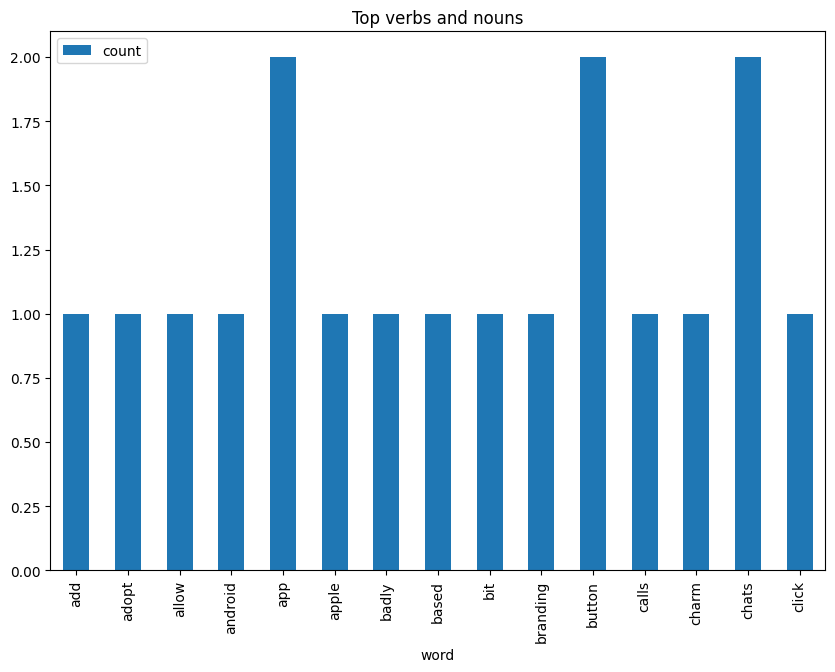

In [61]:
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

**Emotion Mining**

In [62]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [63]:
vee=pd.read_csv('Afinn.csv',
                error_bad_lines=False,
                sep=",",
                encoding='latin-1')
vee

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [64]:
vee[1500:]

word  value
1500  masterpieces      4
1501        matter      1
1502       matters      1
1503        mature      2
1504    meaningful      2
...            ...    ...
2472         yucky     -2
2473         yummy      3
2474        zealot     -2
2475       zealots     -2
2476       zealous      2

[977 rows x 2 columns]

In [65]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(data2))
sentences

['This is my first iPhone and it always feels good to hold this masterpiece.',
 'This looks premium not just because of its branding, it has everything which makes it feel premium.',
 'However, despite all the looks and finish, the transition from Android to Apple is not very smooth and you may constantly lack certain features that can make life easy.',
 'I was using vivo y19 Lite before this and still have that phone with me.',
 'Putting out the feature that is being missed by me-1.',
 'Forwarding Anything in Whatsapp: Forwarding anything in Whatsapp from IPhone takes bit more step as compared to what is being offered in Android.',
 'This makes the entire process slow for an Android User2.',
 'App Switcher: Apple could have easily made App Switcher easy with just light Swipe up, instead they made it with long pressed Swipe up.',
 "Why man, why.. You don't have any features for Swipe up, just make it easy to launch.3.",
 'Andorid Dialer is Always Missed: Every android has a basic featu

In [66]:
sent_df=pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    This is my first iPhone and it always feels go...
1    This looks premium not just because of its bra...
2    However, despite all the looks and finish, the...
3    I was using vivo y19 Lite before this and stil...
4    Putting out the feature that is being missed b...
..                                                 ...
950  This phone have all of the best featuresIt can...
951  Good No words just go for this It's first time...
952                                         Thank you!
953  Definately you can go for itð I would recom...
954             Loved this little one beautiful piece.

[955 rows x 1 columns]

In [67]:
affinity_scores=vee.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [68]:
nlp=spacy.load('en_core_web_sm')

In [85]:
sentiment_lexicon=affinity_scores
def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
       sentence=nlp(text)
       for word in sentence:
          sent_score += sentiment_lexicon.get(word.lemma_, 0)
  return sent_score

In [86]:
calculate_sentiment(text= 'Amazing, wonderful session')

8

In [87]:
calculate_sentiment(text='wonderful session')

4

In [88]:
calculate_sentiment(text='great job, best explation ever')

6

In [89]:
calculate_sentiment(text='good')

3

In [90]:
calculate_sentiment(text='What a ridiculous')

-3

In [91]:
calculate_sentiment(text='worst product and worst service ever')

-6

In [92]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [93]:
sent_df

sentence  sentiment_value
0    This is my first iPhone and it always feels go...                7
1    This looks premium not just because of its bra...                0
2    However, despite all the looks and finish, the...                0
3    I was using vivo y19 Lite before this and stil...                0
4    Putting out the feature that is being missed b...               -2
..                                                 ...              ...
950  This phone have all of the best featuresIt can...               27
951  Good No words just go for this It's first time...                2
952                                         Thank you!                2
953  Definately you can go for itð I would recom...                9
954             Loved this little one beautiful piece.                6

[955 rows x 2 columns]

In [94]:
sent_df.iloc[4,0]

'Putting out the feature that is being missed by me-1.'

In [95]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    This is my first iPhone and it always feels go...                7   
1    This looks premium not just because of its bra...                0   
2    However, despite all the looks and finish, the...                0   
3    I was using vivo y19 Lite before this and stil...                0   
4    Putting out the feature that is being missed b...               -2   
..                                                 ...              ...   
950  This phone have all of the best featuresIt can...               27   
951  Good No words just go for this It's first time...                2   
952                                         Thank you!                2   
953  Definately you can go for itð I would recom...                9   
954             Loved this little one beautiful piece.                6   

     word_count  
0            14  
1            17  
2            29  
3            15  
4            10  
..          ...  
950          93  
951          36  
952           2  
953          38  
954           6  

[955 rows x 3 columns]

In [96]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
154  The option was deprecated when I bought.Also I...               17   
919  Very geed phone easy to use camera is aweasome...               18   
155  Amazing fully genuine product with 100 percent...               18   
173  Good product very nice product I lost my phone...               19   
150  The product buy from Amazon is really amazing ...               19   
240  Thank you seller false Good charge Amazing pho...               22   
145  Luv the phone and the camera is awesome false ...               23   
130  Good product Good product Such a nice product ...               26   
950  This phone have all of the best featuresIt can...               27   
700  Also they charge 1900rs for charger but it cha...               37   

     word_count  
154          70  
919          43  
155          85  
173          59  
150          80  
240          48  
145          50  
130          83  
950          93  
700          95

In [97]:
sent_df.sort_values(by='sentiment_value').head(15)

sentence  sentiment_value  \
297  Don't buy costly item like I phoneDefinitely t...              -14   
447  Wifi issue after 6-7 months, wifi remains conn...              -12   
372  In worst case you will pay 2 3k more as compar...               -9   
401  AFTER BUYING TOO MUCH EXPENSIVE PHONE I JUST T...               -8   
817  And Amazon packed it and sold to us as new pho...               -7   
761  After that, either it will become dull, dirty ...               -7   
594  I mean, dont doubt the camera as bad or worst,...               -7   
775  Really I am disappointment with the both selle...               -7   
229  there is no function to go back), has poor pre...               -7   
844  Now a days from Amazon mostly bad service and ...               -6   
496  My I phone display is very dull as well camera...               -6   
350  Very bad apple false Battery is not long-lasti...               -6   
800  Please do not buy I have no idea what they are...               -6   
850  Very disappointed with the seller for cheating...               -5   
465  Feeling like cheated Writing after about 6 mon...               -5   

     word_count  
297          78  
447          69  
372          71  
401         110  
817          68  
761          13  
594          26  
775          94  
229          26  
844          89  
496          34  
350          26  
800          62  
850          28  
465          78

In [98]:
sent_df['sentiment_value'].describe()

count    955.000000
mean       1.424084
std        4.130630
min      -14.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       37.000000
Name: sentiment_value, dtype: float64

In [99]:
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
1  This looks premium not just because of its bra...                0   
2  However, despite all the looks and finish, the...                0   
3  I was using vivo y19 Lite before this and stil...                0   
4  Putting out the feature that is being missed b...               -2   
5  Forwarding Anything in Whatsapp: Forwarding an...                0   

   word_count  
1          17  
2          29  
3          15  
4          10  
5          23

In [100]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
229  there is no function to go back), has poor pre...               -7   
297  Don't buy costly item like I phoneDefinitely t...              -14   
350  Very bad apple false Battery is not long-lasti...               -6   
372  In worst case you will pay 2 3k more as compar...               -9   
401  AFTER BUYING TOO MUCH EXPENSIVE PHONE I JUST T...               -8   
447  Wifi issue after 6-7 months, wifi remains conn...              -12   
496  My I phone display is very dull as well camera...               -6   
594  I mean, dont doubt the camera as bad or worst,...               -7   
761  After that, either it will become dull, dirty ...               -7   
775  Really I am disappointment with the both selle...               -7   
800  Please do not buy I have no idea what they are...               -6   
817  And Amazon packed it and sold to us as new pho...               -7   
844  Now a days from Amazon mostly bad service and ...               -6   

     word_count  
229          26  
297          78  
350          26  
372          71  
401         110  
447          69  
496          34  
594          26  
761          13  
775          94  
800          62  
817          68  
844          89

In [101]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

229    there is no function to go back), has poor pre...
297    Don't buy costly item like I phoneDefinitely t...
350    Very bad apple false Battery is not long-lasti...
372    In worst case you will pay 2 3k more as compar...
401    AFTER BUYING TOO MUCH EXPENSIVE PHONE I JUST T...
Name: sentence, dtype: object

In [102]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['there is no function to go back), has poor precision in touch, limited battery life which dies much before the day ends to name a few.',
 "Don't buy costly item like I phoneDefinitely they disappoint you worst returns policy Useless, dont buy electronics product online and apple product.I have purchased iphone 13 because of such big brand apple and the Amazon but I am facing issue in mobile not able to detect sim card.Apple is not providing any service they are saying this mobile was damaged internally however mobile is not damaged any where not dropped but Facing such bad exp from both brands.",
 'Very bad apple false Battery is not long-lasting Bad product finishing, display to Frame 2 A4 sheet can be inserted Defective set of I phone 13.',
 "In worst case you will pay 2 3k more as compared to online shopping but you will surely get original productsâ\x80¦ choice is yoursâ\x80¦.ð\x9f\x91\x8dð\x9f\x91\x8d Worst buy ever battery drains very fast it does not last even 4 hours with 85 

In [103]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'there is no function to go back), has poor precision in touch, limited battery life which dies much before the day ends to name a few.'

In [104]:
sent_df['index']=range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

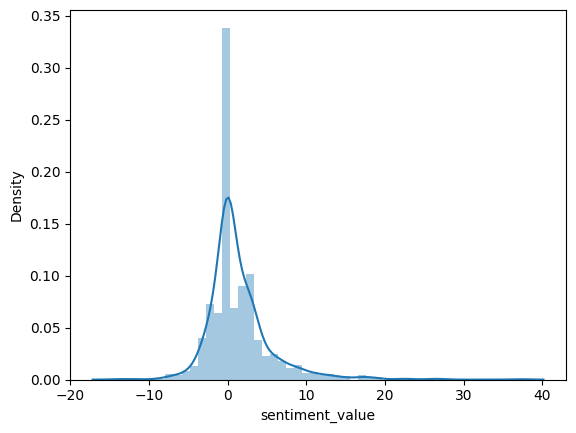

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

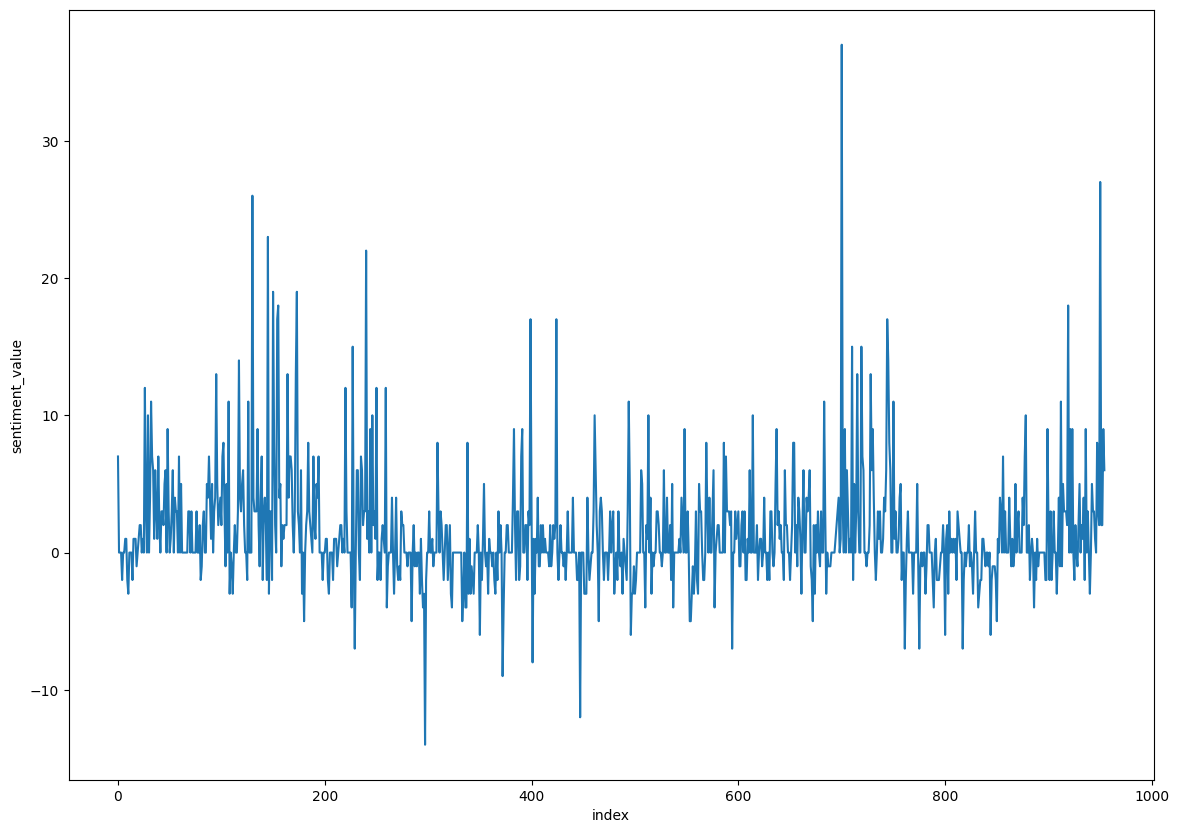

In [106]:
plt.figure(figsize=(14,10))
sns.lineplot(y='sentiment_value', x='index', data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

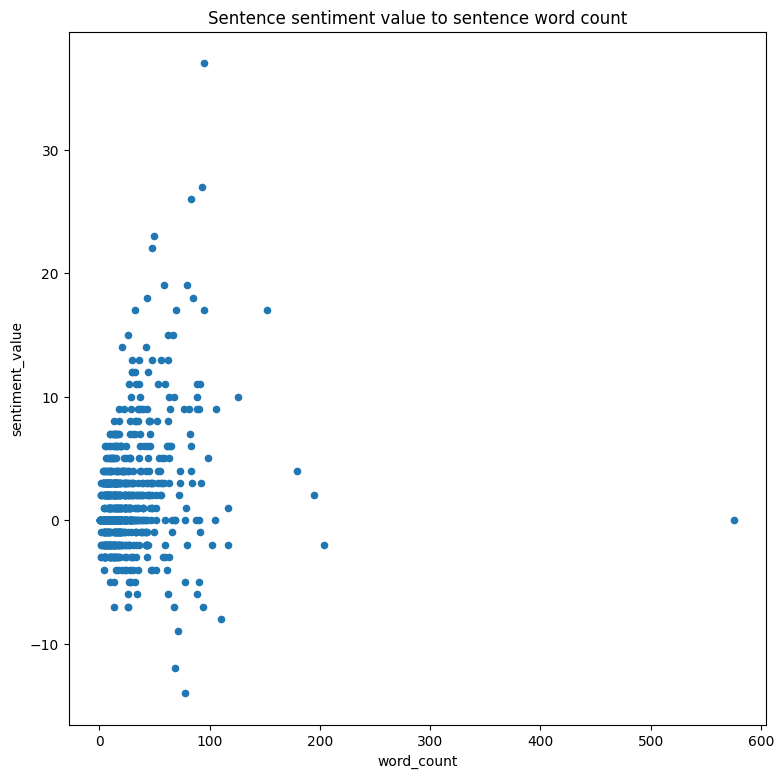

In [107]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [108]:
from google.colab import files
uploaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [109]:
pw=pd.read_csv('positive-words.txt',
               error_bad_lines=False)
pw

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                           
1                           ; Opinion Lexicon: Positive                          
2                                                     ;                          
3     ; This file contains a list of POSITIVE opinio...                          
4                                                     ;                          
...                                                 ...                          
2026                                           youthful                          
2027                                               zeal                          
2028                                             zenith                          
2029                                               zest                          
2030                                              zippy                          

[2031 rows x 1 columns]

In [110]:
from google.colab import files
uploaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [114]:
nw=pd.read_csv('negative-words.txt',
               error_bad_lines=False,
               encoding='latin-1')
nw

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                             
1                           ; Opinion Lexicon: Negative                            
2                                                     ;                            
3     ; This file contains a list of NEGATIVE opinio...                            
4                                                     ;                            
...                                                 ...                            
4803                                               zaps                            
4804                                             zealot                            
4805                                            zealous                            
4806                                          zealously                            
4807                                             zombie                            

[4808 rows x 1 columns]

In [117]:
pw =pw.iloc[25:]
pw =pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
pw.reset_index(inplace=True)
pw =pw.drop('index',axis=1)
pw['Score'] = 1
pw

Words  Score
0     advantageously      1
1         advantages      1
2      adventuresome      1
3        adventurous      1
4           advocate      1
...              ...    ...
1951        youthful      1
1952            zeal      1
1953          zenith      1
1954            zest      1
1955           zippy      1

[1956 rows x 2 columns]

In [120]:
nw = nw.iloc[25:]
nw = nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
nw.reset_index(inplace=True)
nw = nw.drop('index',axis=1)
nw['Score'] = -1
nw

Words  Score
0       acrimonious     -1
1     acrimoniously     -1
2          acrimony     -1
3           adamant     -1
4         adamantly     -1
...             ...    ...
4728           zaps     -1
4729         zealot     -1
4730        zealous     -1
4731      zealously     -1
4732         zombie     -1

[4733 rows x 2 columns]

In [122]:
affinity_scores1=pw.set_index('Words')['Score'].to_dict()
affinity_scores2=nw.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores=affinity_scores1
affinity_scores

{'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable': 1,
 'affably': 1,
 'affectation': 1,
 'affection': 1,
 'affectionate': 1,
 'affinity': 1,
 'affirm': 1,
 'affirmation': 1,
 'affirmative': 1,
 'affluence': 1,
 'affluent': 1,
 'afford': 1,
 'affordable': 1,
 'affordably': 1,
 'afordable': 1,
 'agile': 1,
 'agilely': 1,
 'agility': 1,
 'agreeable': 1,
 'agreeableness': 1,
 'agreeably': 1,
 'all-around': 1,
 'alluring': 1,
 'alluringly': 1,
 'altruistic': 1,
 'altruistically': 1,
 'amaze': 1,
 'amazed': 1,
 'amazement': 1,
 'amazes': 1,
 'amazing': 1,
 'amazingly': 1,
 'ambitious': 1,
 'ambitiously': 1,
 'ameliorate': 1,
 'amenable': 1,
 'amenity': 1,
 'amiability': 1,
 'amiabily': 1,
 'amiable': 1,
 'amicability': 1,
 'amicable': 1,
 'amicably': 1,
 'amity': 1,
 'ample': 1,
 'amply': 1,
 'amuse': 1,
 'amusing': 1,
 'amusingly': 1,
 'angel': 1,
 'angelic': 1,
 'apotheosis': 1,
 'a

In [123]:
sentiment_lexicon=affinity_scores
def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
       sentence=nlp(text)
       for word in sentence:
          sent_score += sentiment_lexicon.get(word.lemma_, 0)
  return sent_score

In [124]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df

sentence  sentiment_value  \
0    This is my first iPhone and it always feels go...                2   
1    This looks premium not just because of its bra...                0   
2    However, despite all the looks and finish, the...                1   
3    I was using vivo y19 Lite before this and stil...                0   
4    Putting out the feature that is being missed b...               -1   
..                                                 ...              ...   
950  This phone have all of the best featuresIt can...               10   
951  Good No words just go for this It's first time...                1   
952                                         Thank you!                1   
953  Definately you can go for itð I would recom...                2   
954             Loved this little one beautiful piece.                2   

     word_count  index  
0            14      0  
1            17      1  
2            29      2  
3            15      3  
4            10      4  
..          ...    ...  
950          93    950  
951          36    951  
952           2    952  
953          38    953  
954           6    954  

[955 rows x 4 columns]

In [125]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    This is my first iPhone and it always feels go...                2   
1    This looks premium not just because of its bra...                0   
2    However, despite all the looks and finish, the...                1   
3    I was using vivo y19 Lite before this and stil...                0   
4    Putting out the feature that is being missed b...               -1   
..                                                 ...              ...   
950  This phone have all of the best featuresIt can...               10   
951  Good No words just go for this It's first time...                1   
952                                         Thank you!                1   
953  Definately you can go for itð I would recom...                2   
954             Loved this little one beautiful piece.                2   

     word_count  index  
0            14      0  
1            17      1  
2            29      2  
3            15      3  
4            10      4  
..          ...    ...  
950          93    950  
951          36    951  
952           2    952  
953          38    953  
954           6    954  

[955 rows x 4 columns]

In [126]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
95   With features like Face ID and enhanced data p...                8   
240  Thank you seller false Good charge Amazing pho...                8   
950  This phone have all of the best featuresIt can...               10   
130  Good product Good product Such a nice product ...               12   
700  Also they charge 1900rs for charger but it cha...               12   

     word_count  index  
95           36     95  
240          48    240  
950          93    950  
130          83    130  
700          95    700

In [128]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
297  Don't buy costly item like I phoneDefinitely t...               -6   
401  AFTER BUYING TOO MUCH EXPENSIVE PHONE I JUST T...               -5   
372  In worst case you will pay 2 3k more as compar...               -5   
373  Damaged product Received different specificati...               -4   
350  Very bad apple false Battery is not long-lasti...               -4   

     word_count  index  
297          78    297  
401         110    401  
372          71    372  
373          23    373  
350          26    350

In [129]:
sent_df['sentiment_value'].describe()

count    955.000000
mean       0.581152
std        1.875714
min       -6.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       12.000000
Name: sentiment_value, dtype: float64

In [130]:
sent_df[sent_df['sentiment_value']<0].head()

sentence  sentiment_value  \
4   Putting out the feature that is being missed b...               -1   
6   This makes the entire process slow for an Andr...               -1   
9   Andorid Dialer is Always Missed: Every android...               -1   
10                               This is really bad..               -1   
14          Android user will miss this very badly.4.               -1   

    word_count  index  
4           10      4  
6           10      6  
9           42      9  
10           4     10  
14           7     14

In [131]:
sent_df[sent_df['sentiment_value']<-1]

sentence  sentiment_value  \
80   This phone wonât disappoint you in any aspec...               -2   
108  * horrible battery life, i end up charging twi...               -3   
112  If you don't have it yet, don't buy it as it i...               -2   
146  But product delivery was very poor and exchang...               -2   
180  I was confused as there were fake phones been ...               -2   
..                                                 ...              ...   
839  60,499 because there was a bigger discount tha...               -2   
844  Now a days from Amazon mostly bad service and ...               -3   
886  Oneplus device also suffered from Screenburn.H...               -3   
890  Typing is a problem as the screen is smaller c...               -3   
925  No complaints here!Hanging: Zero issues with h...               -3   

     word_count  index  
80           60     80  
108          30    108  
112          88    112  
146          31    146  
180          10    180  
..          ...    ...  
839          38    839  
844          89    844  
886          28    886  
890          42    890  
925           9    925  

[61 rows x 4 columns]

In [132]:
sent_df[sent_df['sentiment_value']<-1].head()['sentence']

80     This phone wonât disappoint you in any aspec...
108    * horrible battery life, i end up charging twi...
112    If you don't have it yet, don't buy it as it i...
146    But product delivery was very poor and exchang...
180    I was confused as there were fake phones been ...
Name: sentence, dtype: object

In [133]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['This phone wonâ\x80\x99t disappoint you in any aspect,whether itâ\x80\x99s the battery life,performance or the cameras but what you might miss is a 120hz screen or perhaps a telephoto lens but if those things do not concern you then thereâ\x80\x99s actually no reason for you to not buy this, itâ\x80\x99s the best phone if you can get it for under 50k,period.',
 '* horrible battery life, i end up charging twice a day* camera app freezes in when portrait mode is opened* Phone is much more laggy since the iOS 17 update.',
 "If you don't have it yet, don't buy it as it is a  slow charger (for overnight charging) and generates a lot of heat when charging, i ended up buying an  aluminium stand so that the heat would dissipate through the stand.If a company forces you to buy several other products for the customer to use it for its intended purpose, then please choose another device.Westerners don't have to worry about it as they have apple care + clubbed into their purchase in the form of 

In [134]:
sent_df['index']=range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

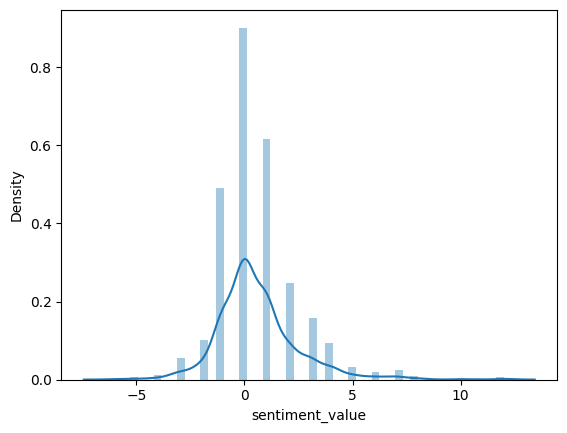

In [135]:
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

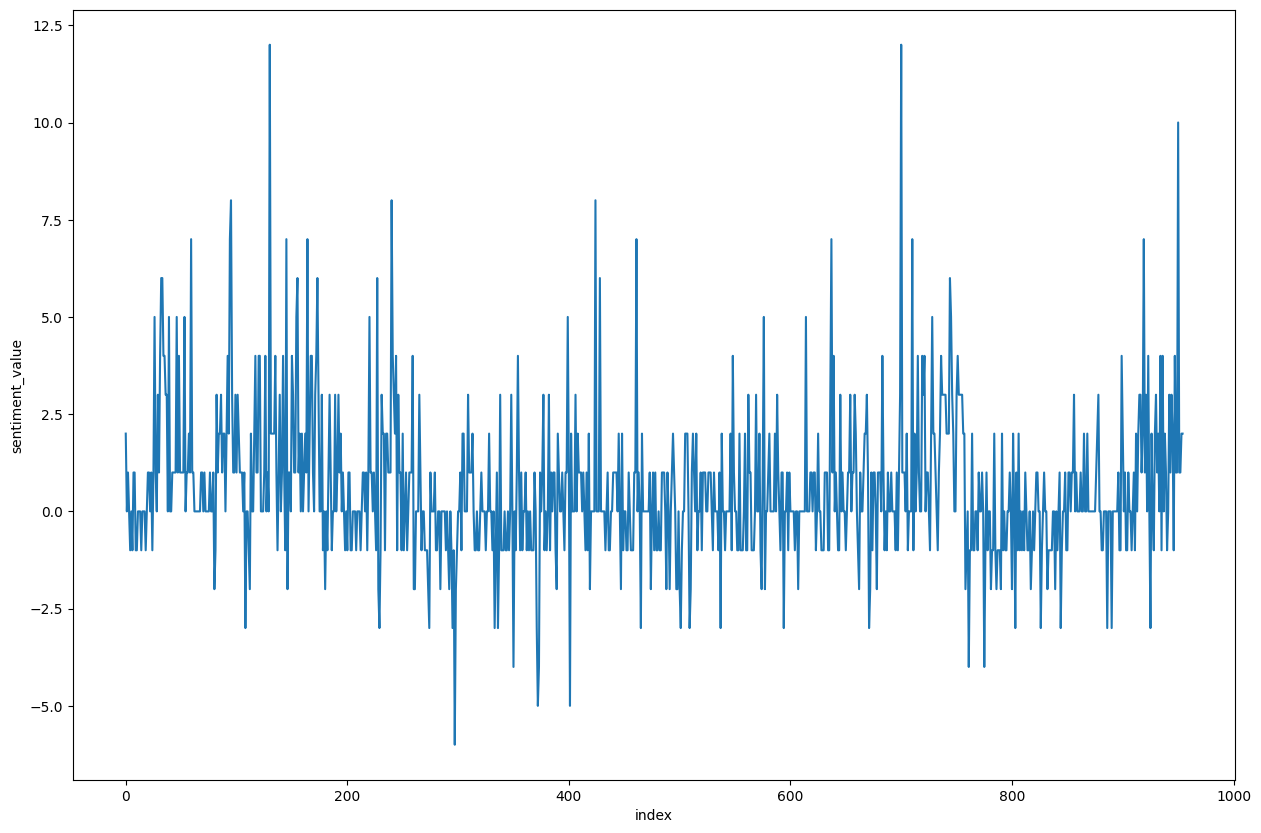

In [136]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value', x='index', data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

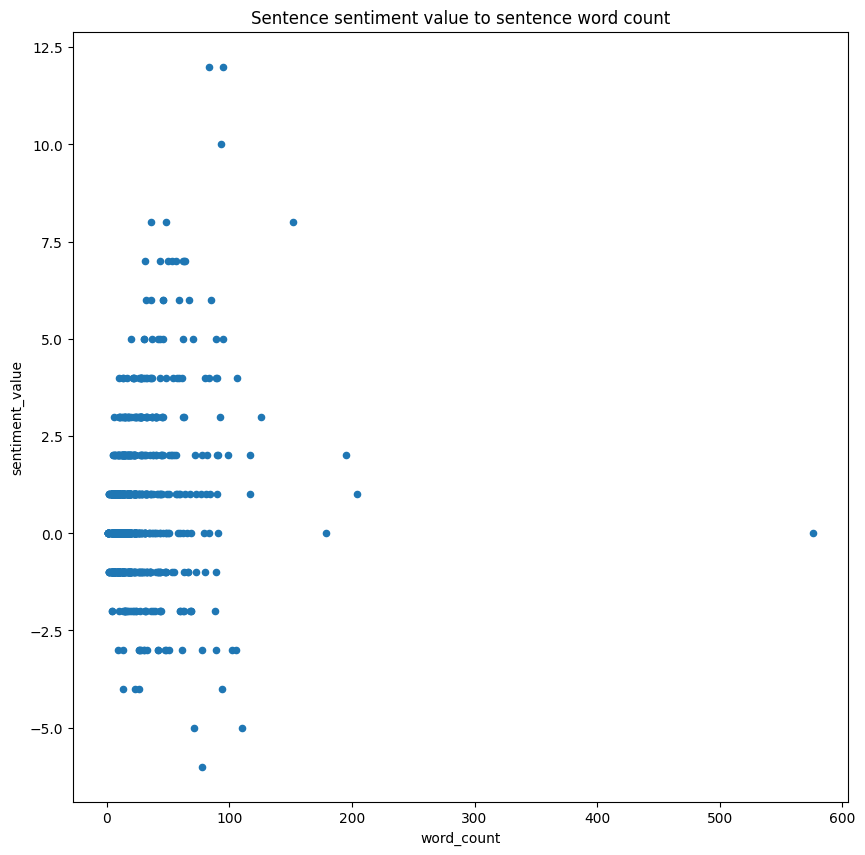

In [137]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')

**Positive and Negative words can't give us better results for sentimental analysis as compared to vee(affin dataset) which gives us better analysis**